        DiBS    TRUST-D    GADGET  TRUST-G
0       DiBS      TRUST    GADGET  TRUST-G
1   -23035.4   -10202.7   -9485.6  -9462.7
2   -17965.0   -10050.8   -9540.8  -9546.9
3   -16922.1    -9783.1  -10047.5  -9884.1
4   -26805.4   -10434.1   -9812.8  -9963.7
5   -21085.6   -10548.9  -10056.1  -9974.0
6   -22473.2   -10366.0   -9658.4  -9600.4
7   -21074.8    -9908.2   -9430.6  -9414.1
8   -21417.9    -9830.9   -9946.1  -9957.1
9   -29724.6   -10107.3   -9474.1  -9363.8
10  -27745.9    -9939.2   -9105.1  -9092.4
11  -20471.3    -9649.6   -9778.8  -9807.8
12  -25336.1   -10079.3   -9440.0  -9396.5
13  -20612.7   -10070.0   -9626.1  -9608.1
14  -24572.9   -10742.4   -9391.0  -9374.5
15  -26592.4   -10574.0  -10174.9  -9997.1
16  -21397.7    -9872.2   -9322.5  -9372.8
17  -19440.0    -9827.8   -9559.2  -9573.4
18  -20072.1    -9912.7   -9670.3  -9863.7
19  -22584.7   -10341.9   -9384.8  -9350.1
20  -27272.2   -10662.0   -9770.3  -9768.0
21  -23105.8   -10275.4   -9623.5  -9680.5
22  -18797.

Text(0.5, 0, ' ')

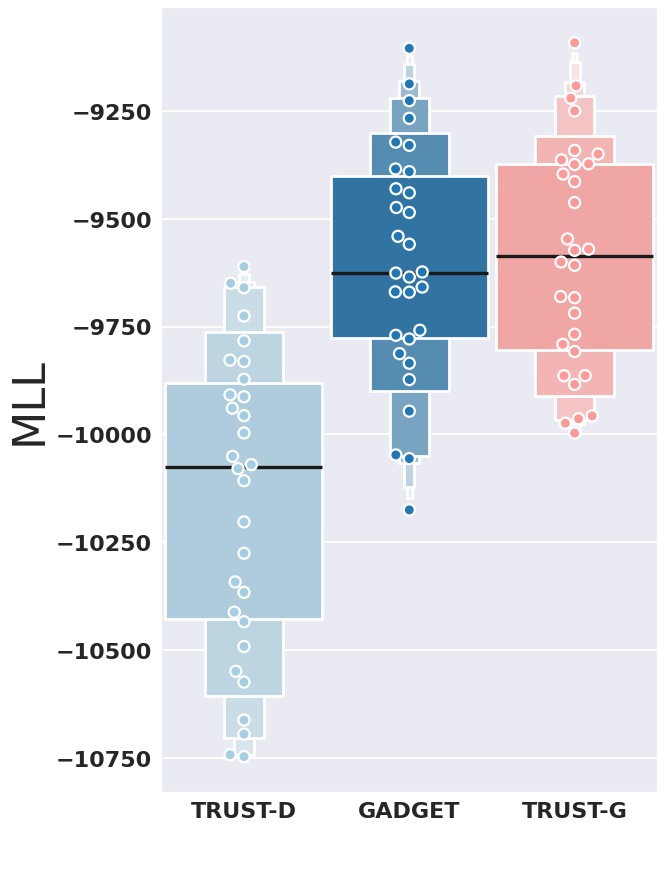

In [33]:
import pandas as pd

METRIC = "mll"
if(METRIC == "msece" or METRIC == "mll"):
    data = pd.read_csv("%s.csv"%(METRIC), names=[ "DiBS", "TRUST-D", "GADGET", "TRUST-G"], skiprows=0)
    print(data)
    data = data.drop(0)
    data = data.drop(labels = "DiBS", axis=1)
    data.head()
else:
    data = pd.read_csv("%s.csv"%(METRIC), names=[ "DiBS", "DiBS+", "TRUST-D", "GADGET", "TRUST-G"], skiprows=0)
    data = data.drop(0)
    data.head()


# In[23]:


data.head()
print(METRIC)
#print("DiBS", min(data["DiBS"].to_numpy().astype(float)), max(data["DiBS"].to_numpy().astype(float)))
print("TRUST-D", min(data["TRUST-D"].to_numpy().astype(float)), max(data["TRUST-D"].to_numpy().astype(float)))
print("GADGET", min(data["GADGET"].to_numpy().astype(float)), max(data["GADGET"].to_numpy().astype(float)))
print("TRUST-G", min(data["TRUST-G"].to_numpy().astype(float)), max(data["TRUST-G"].to_numpy().astype(float)))


# In[2]:


values = []
labels = []
for index, row in data.iterrows():
    #values.append(float(row["DiBS"])); labels.append("DiBS")
    #values.append(float(row["DiBS+"])); labels.append("DiBS+")
    values.append(float(row["TRUST-D"])); labels.append("TRUST-D")
    values.append(float(row["GADGET"])); labels.append("GADGET")
    values.append(float(row["TRUST-G"])); labels.append("TRUST-G")
zippeddata = zip(values, labels)
data = pd.DataFrame(data=zippeddata, columns=[METRIC.upper(), "Method"])


# In[4]:


import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.ticker import MultipleLocator
sns.set_context("paper", rc={'axes.labelsize': 57.6,
 'axes.titlesize': 28.2,
 'font.size': 32.2,
 'grid.linewidth': 1.6,
 'legend.fontsize': 16.0,
 'lines.linewidth': 2.8,
 'lines.markeredgewidth': 0.0,
 'lines.markersize': 11.2,
 'patch.linewidth': 0.48,
 'xtick.labelsize': 24.0,
 'xtick.major.pad': 11.2,
 'xtick.major.width': 1.6,
 'xtick.minor.width': 0.8,
 'ytick.labelsize': 24.0,
 'ytick.major.pad': 11.2,
 'ytick.major.width': 1.6,
 'ytick.minor.width': 0.8})

sns.set_style('darkgrid')
font = {'weight' : 'bold', "size":12}
matplotlib.rc('font', **font)

pal = sns.color_palette("hls", 5)
pal = "Set2"
pal = sns.color_palette("Paired",8)
del(pal[2])
del(pal[2])
figure(figsize=(8, 13), dpi=80)
plt.gca().xaxis.set_major_locator(MultipleLocator(1))
#sns.set_theme(style="whitegrid")
sns.set_theme(style="darkgrid")


ax = sns.boxenplot(x="Method", y=METRIC.upper(), data=data, showfliers = False,
                   k_depth=6, width=0.95, linewidth=100.0, palette=pal)
lin = ax.lines[0:4]
for l in lin:
    # set median line style
    #l.set_linestyle(':')
    l.set_color('k')
    l.set_linewidth(3)
    l.set_alpha(1)

[p.set_linewidth(2.5) for p in plt.gcf().findobj(matplotlib.collections.PatchCollection)]
[p.set_color('white') for p in plt.gcf().findobj(matplotlib.collections.PatchCollection)]

b = sns.swarmplot(x="Method", y=METRIC.upper(), data=data, dodge=True, ax=ax,
              edgecolor="white", linewidth=2, palette=pal, size=10)
b.tick_params(labelsize=20)
b.set_ylabel("MLL", fontsize=40)

if(METRIC == "msece"):
    plt.yscale('log')

plt.xlabel(" ")
